# Predict Blood Donations Project Proposal

#### In this project I have made a machine learning model to predict if a blood donor application for donating will get approved or not using Supervised Learning with scikit-learn and Data Manipulation with pandas.

## Project Description 

#### Blood  banks and hospitals receive a lot of applications for blood donation. Many of them get rejected for many reasons, like previous donated date,health issues or too many inquiries on an individual’s donor, for example. Manually analyzing these applications is error-prone, and time consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every hospital & blood bank doe so nowadays. In this project, I will build an automatic bloood donor approval predictor using machine learning techniques.

## Motivation

#### Exploratory data analysis (EDA) :  the process of going through a dataset and finding out more about it.

#### Model training: create models to learn to predict a target variable based on other variables.

#### Model evaluation :evaluating a models predictions using problem-specific evaluation metrics.

#### Model comparison:comparing several different models to find the best one.

#### Model fine-tuning :once we've found a good model, how can we improve it?

#### Feature importance To find out which are more important for prediction.

##  Problem Definition

#### In our case, the problem we will be exploring is binary classification

#### This is because we're going to be using a number of differnet features about a blood donor to predict whether they can donate on that time or not.

In [237]:
## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_excel('New Microsoft Excel Worksheet.xlsx')

In [3]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
data.tail() # to see the last rows of the data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [5]:
data.shape

(748, 5)

In [6]:
data.describe() ## to have a statistical summary about the data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
data.isnull().sum()/len(data)*100  ## to check and count the percentage of missing values in each column 

Recency (months)                              0.0
Frequency (times)                             0.0
Monetary (c.c. blood)                         0.0
Time (months)                                 0.0
whether he/she donated blood in March 2007    0.0
dtype: float64

In [9]:
data.rename(columns = {'Recency (months)':'Recency_months'})

,Recency_months,Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [10]:
data.columns = ['Recency_months','Frequency','Monetary_cc_blood','Time_in_months','Target']

In [11]:
data

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [238]:
data.Target.value_counts() ## to see the value counts of target column.

0    514
1    146
Name: Target, dtype: int64

In [13]:
data.Target.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: Target, dtype: float64

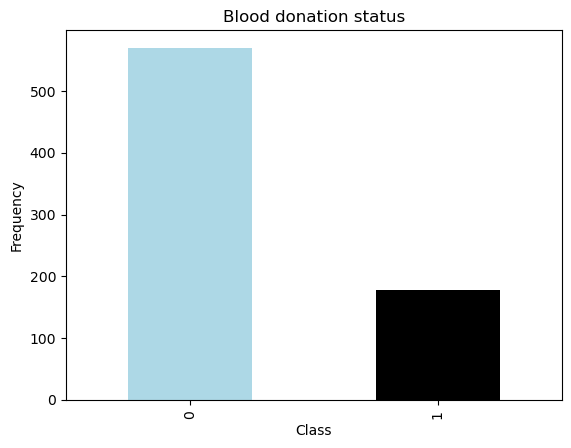

In [14]:
data.Target.value_counts().plot(kind="bar", color=[ 'lightblue','k'])
plt.title('Blood donation status')
plt.xlabel('Class')
plt.ylabel('Frequency');

In [15]:
## used box plot to locate outliers in Employed_days column

In [16]:
import seaborn as sns

<Axes: >

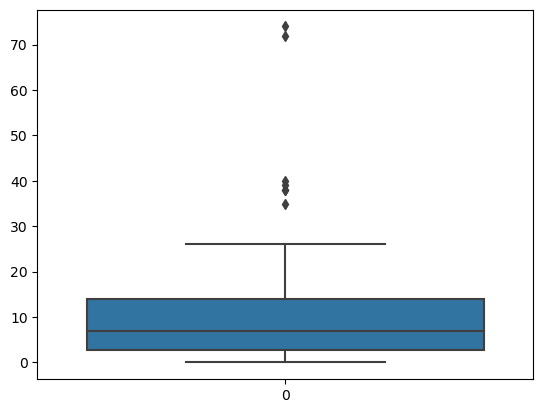

In [17]:
sns.boxplot(data['Recency_months'])

In [18]:
## we can see that this column have a lot of outliers

## Outlier Detection and removal with IQR

In [19]:
Q1 = data['Recency_months'].quantile(0.25) 
Q3 = data['Recency_months'].quantile(0.75)

In [20]:
Q1,Q3

(2.75, 14.0)

In [21]:
IQR = Q3-Q1

In [22]:
IQR

11.25

In [23]:
low_lim = Q1 - 1.5 * IQR
high_lim = Q3 + 1.5 * IQR

In [24]:
data = data[(data['Recency_months'] > low_lim) & (data['Recency_months'] < high_lim)] ## select the rows greater than lower fence and 
                                                                                    ## less than higher fence.

In [25]:
data

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [26]:
data.describe()

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
count,741.00000,741.000000,741.000000,741.000000,741.000000
mean,9.14305,5.554656,1388.663968,34.113360,0.240216
std,7.04415,5.851892,1462.973082,24.381497,0.427503
min,0.00000,1.000000,250.000000,2.000000,0.000000
25%,2.00000,2.000000,500.000000,16.000000,0.000000
50%,7.00000,4.000000,1000.000000,28.000000,0.000000
75%,14.00000,7.000000,1750.000000,50.000000,0.000000
max,26.00000,50.000000,12500.000000,98.000000,1.000000


<Axes: >

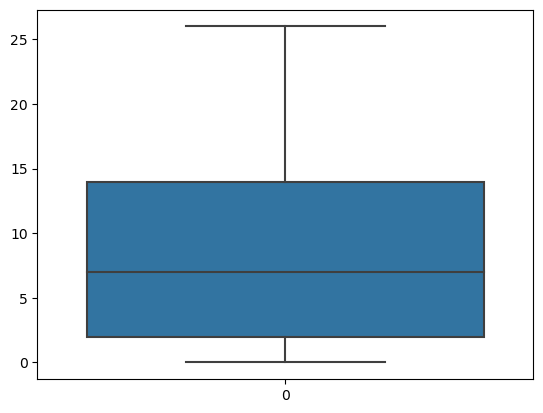

In [27]:
sns.boxplot(data['Recency_months'])

In [28]:
#### Kernel density estimator is used to see the distibution

<Axes: xlabel='Recency_months', ylabel='Density'>

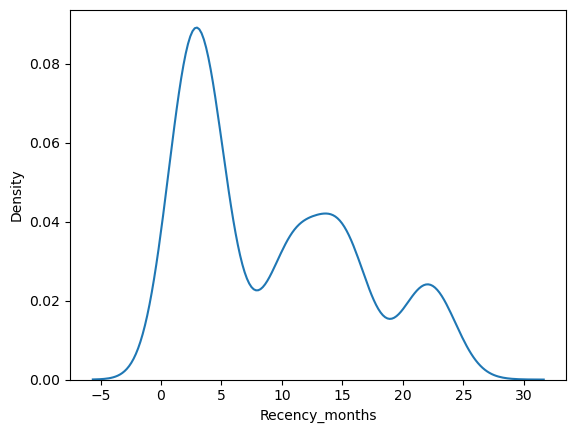

In [29]:
sns.kdeplot(data['Recency_months'])

<Axes: xlabel='Frequency', ylabel='Density'>

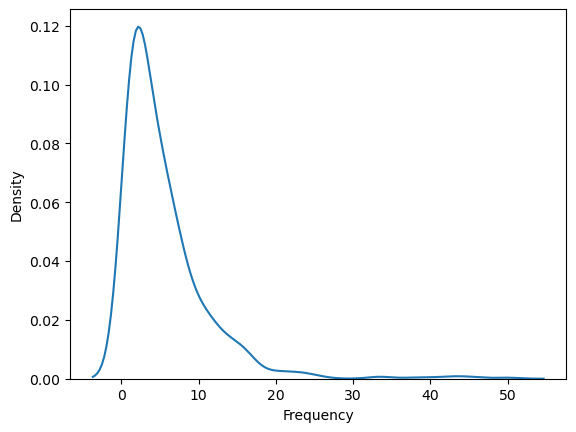

In [30]:
sns.kdeplot(data['Frequency'])

In [31]:
## we can see that frequencu has outliers on tail

In [32]:
## IQR is used to remove the outliers

In [33]:
q1 = data['Frequency'].quantile(0.25)
q3 = data['Frequency'].quantile(0.75)

In [34]:
q1,q3

(2.0, 7.0)

In [35]:
iqr  = q3-q1

In [36]:
iqr

5.0

In [37]:
lower_lim = q1 - 1.5 * iqr
higher_lim = q3 + 1.5 * iqr

In [38]:
data = data[(data['Frequency'] > lower_lim) & (data['Frequency'] < higher_lim)] ## select the rows greater than lower fence and 
                                                                                    ## less than higher fence.

In [39]:
data

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
1,0,13,3250,28,1
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [40]:
## we can see that many rows have been filtered out

In [41]:
data.describe()

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,9.260057,4.479885,1119.971264,31.579023,0.227011
std,7.057210,3.393120,848.280020,22.476579,0.419201
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,8.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,26.000000,14.000000,3500.000000,98.000000,1.000000


<Axes: xlabel='Frequency', ylabel='Density'>

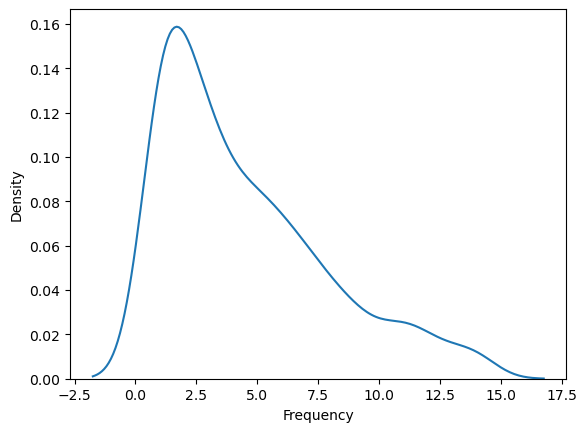

In [42]:
sns.kdeplot(data['Frequency'])

In [43]:
data.describe()

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,9.260057,4.479885,1119.971264,31.579023,0.227011
std,7.057210,3.393120,848.280020,22.476579,0.419201
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,8.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,46.000000,0.000000
max,26.000000,14.000000,3500.000000,98.000000,1.000000


In [44]:
import seaborn as sns

<Axes: xlabel='Monetary_cc_blood', ylabel='Density'>

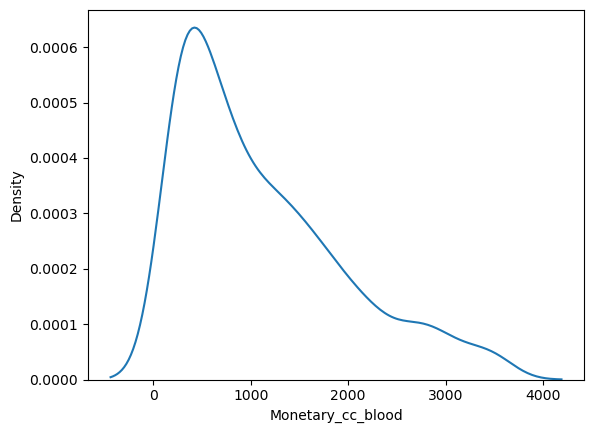

In [45]:
sns.kdeplot(data['Monetary_cc_blood'])

In [46]:
Q1 = data['Monetary_cc_blood'].quantile(0.25)
Q3 = data['Monetary_cc_blood'].quantile(0.75)

In [47]:
Q1,Q3

(500.0, 1500.0)

In [48]:
IQR = Q3-Q1

In [49]:
IQR

1000.0

In [50]:
low_lim = Q1 - 1.5 * IQR
high_lim = Q3 + 1.5 * IQR

In [51]:
data = data[(data['Monetary_cc_blood'] > low_lim) & (data['Monetary_cc_blood'] < high_lim)]

In [52]:
data

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
5,4,4,1000,4,0
6,2,7,1750,14,1
8,2,9,2250,22,1
11,0,3,750,4,0
12,2,10,2500,28,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [53]:
data.describe()

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,9.390909,4.016667,1004.166667,29.880303,0.221212
std,7.043453,2.818973,704.743350,21.301134,0.415378
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,14.000000,0.000000
50%,9.000000,3.000000,750.000000,26.000000,0.000000
75%,14.000000,6.000000,1500.000000,41.000000,0.000000
max,26.000000,11.000000,2750.000000,95.000000,1.000000


In [54]:
## Now we can see that all the outliers have been removed from the dataset

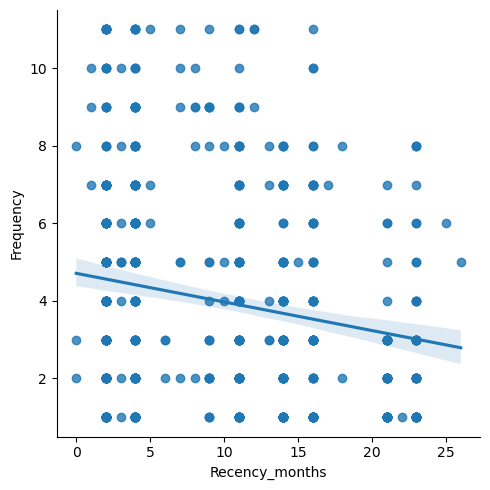

In [55]:
sns.lmplot(x = 'Recency_months', y = 'Frequency', data = data)
plt.show()

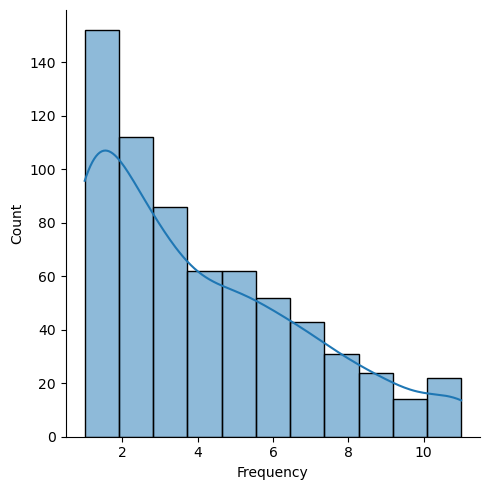

In [56]:
sns.displot(data['Frequency'],kde=True)

In [57]:
# Let's see how many positive (0) and negative (1) samples we have in our dataframe
data['Target'].value_counts()

0    514
1    146
Name: Target, dtype: int64

#### Since these two values are not equal, our target column can be considered imbalanced.

In [58]:
data.Target.value_counts(normalize=True)

0    0.778788
1    0.221212
Name: Target, dtype: float64

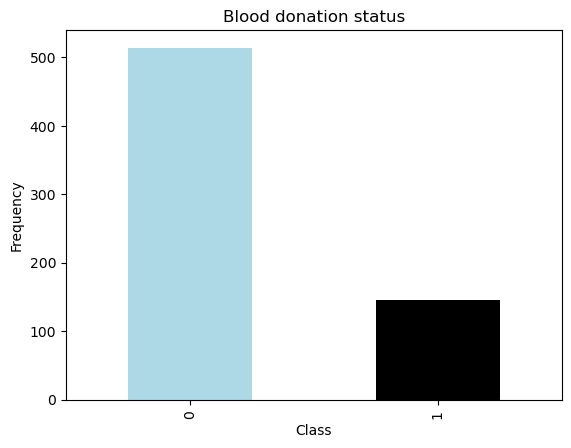

In [59]:
data.Target.value_counts().plot(kind="bar", color=[ 'lightblue','k'])
plt.title('Blood donation status')
plt.xlabel('Class')
plt.ylabel('Frequency');

#### We can see that it is perfectly imbalanced data . The ratio of rejected & approved is 3:1

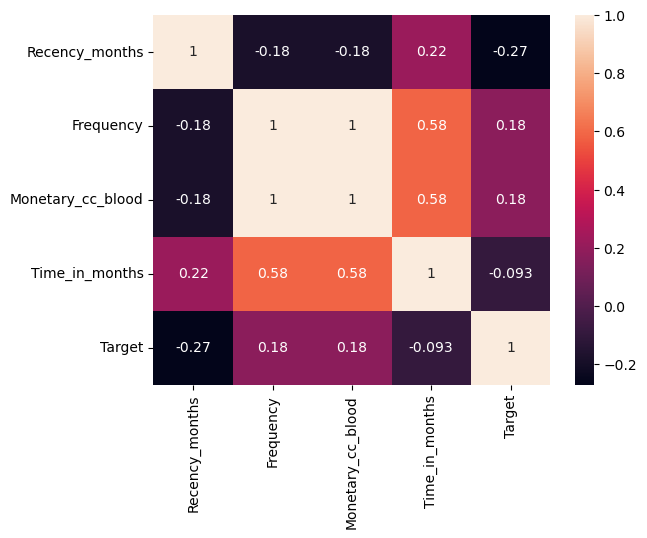

In [60]:
corr= data.corr()
sns.heatmap(corr,annot=True)
plt.show()

####  There is no such numerical columns which are highly correlated with each other.

## Fixing Imbalanced dataset

In [61]:
Approved = data[data['Target']==1]
Rejected = data[data['Target']==0]

In [62]:
print(Approved.shape,Rejected.shape)

(146, 5) (514, 5)


#### We can clearly see that it is a perfect example of imbalanced data. The datset contains information about blood donors. The datset presents two part ,  146 customers can donate blood out of 660 donors and 514 donors can't donate blood. There is a ratio of approx 3.5:1 

# Handing inbalanced data using Oversampling 

#### Since our data is not too large having only 660 rows so we use oversampling technique . This is one   of the efficient process in sampling . here we will not loose any information as we are not using under sampling method. in this process it will create some more more data ponits to handle this data and try to make the ratio approx 1:1

In [63]:
from sklearn.utils import resample

In [64]:
data

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
5,4,4,1000,4,0
6,2,7,1750,14,1
8,2,9,2250,22,1
11,0,3,750,4,0
12,2,10,2500,28,1
...,...,...,...,...,...
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0


In [65]:
columns = data.columns.tolist()

In [66]:
columns

['Recency_months',
 'Frequency',
 'Monetary_cc_blood',
 'Time_in_months',
 'Target']

In [67]:
columns = [c for c in columns if c not in ['Target']]

In [68]:
columns

['Recency_months', 'Frequency', 'Monetary_cc_blood', 'Time_in_months']

In [69]:
X = data[columns]

In [70]:
X.head()

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months
5,4,4,1000,4
6,2,7,1750,14
8,2,9,2250,22
11,0,3,750,4
12,2,10,2500,28


In [71]:
Y = data['Target']

In [72]:
## Implementing oversampling for handling the imbalanced data 

In [114]:
from imblearn.over_sampling import RandomOverSampler

In [115]:
os = RandomOverSampler()

In [116]:
X_res,Y_res=os.fit_resample(X,Y)

In [117]:
print(X_res.shape,Y_res.shape)

(1028, 4) (1028,)


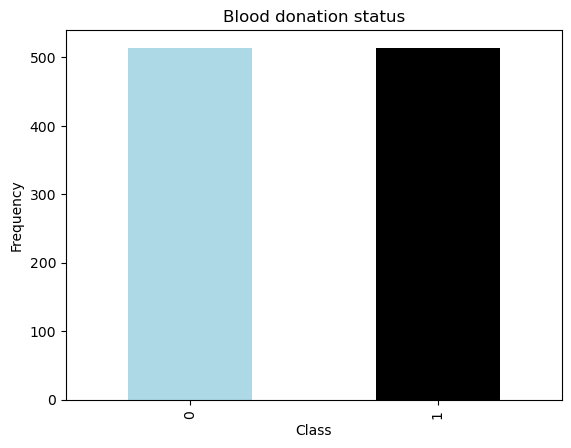

In [118]:
Y_res.value_counts().plot(kind="bar", color=[ 'lightblue','k'])
plt.title('Blood donation status')
plt.xlabel('Class')
plt.ylabel('Frequency');

###  Now the data has become balanced and we can procced futher.

In [119]:
df_final = pd.concat([X_res,Y_res],axis=1) ## to conactenate the input & output data

In [120]:
df_final

,Recency_months,Frequency,Monetary_cc_blood,Time_in_months,Target
0,4,4,1000,4,0
1,2,7,1750,14,1
2,2,9,2250,22,1
3,0,3,750,4,0
4,2,10,2500,28,1
...,...,...,...,...,...
1023,11,3,750,16,1
1024,13,3,750,14,1
1025,4,2,500,4,1
1026,2,4,1000,14,1


## Splitting the data into Training and Test data

In [121]:
from sklearn.model_selection import train_test_split     ## we take 15 % for test data and 85 % for training

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.15,  random_state = 5) 

In [122]:
print(X_res.shape, X_train.shape ,Y_train.shape, X_test.shape) ## shape of test and train data

(1028, 4) (873, 4) (873,) (155, 4)


## Model Training :
## 1. Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
log_reg = LogisticRegression ()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [125]:
y_pred = log_reg.predict(X_test)

In [126]:
accuracy_score(Y_test, y_pred)

0.7354838709677419

In [127]:
log_reg_score = log_reg.score(X_test,Y_test)

In [128]:
log_reg_score

0.7354838709677419

## 2. Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dec_tree = DecisionTreeClassifier(max_depth=8,max_features='sqrt')

In [131]:
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8, max_features='sqrt')

In [132]:
y_pred_dt = dec_tree.predict(X_test)

In [134]:
accuracy_score(Y_test,y_pred_dt)

0.7548387096774194

In [135]:
dt_score = dec_tree.score(X_test,Y_test)

In [154]:
dt_score

0.7548387096774194

#### to check for overfitting we check the model by giving X_train values to predict

In [137]:
y_pred_train = dec_tree.predict(X_train)

In [138]:
accuracy_score(Y_train,y_pred_train)

0.8018327605956472

In [100]:
## We can see that the model is not overfitting

## 3.Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier()

In [144]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [145]:
rf_pred = rf.predict(X_test)

In [146]:
accuracy_score(Y_test,rf_pred)

0.7870967741935484

In [147]:
rf_score = rf.score(X_test,Y_test)

In [162]:
rf_score

0.7870967741935484

In [108]:
#### But we need to check that the model is  overfitting or not

In [149]:
Y_tr_val = rf.predict(X_train)

In [150]:
accuracy_score(Y_train,Y_tr_val)

0.9014891179839634

In [111]:
## We can clearly see that model is not overfitting

## Model comparison

In [151]:
model_scores={'logistic reg':log_reg_score,'Decision Tree':dt_score,'Random Forest':rf_score}

### Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

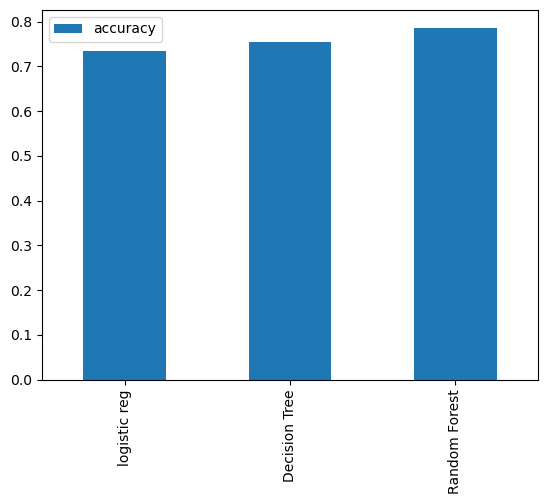

In [152]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

#### We can see from the graph that the Random Forest model performed best among these.
#### The accuracy score of random forest is approx 78 % which is quite impressive but we need to tune  the model for best performance.

#### Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

#### Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).

#### Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.

#### Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.

#### F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.

#### Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

# Hyperparameter tuning for increase accuracy with RandomizedSearchCV

### Random Forest hyperparameters  to control the overfitting 

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
rf_parameters = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 15, 2)}

In [197]:
rf_class = RandomizedSearchCV(rf,param_distributions=rf_parameters,scoring='accuracy',cv=10,verbose=True)

In [198]:
rf_class.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='accuracy', verbose=True)

In [199]:
rf_class.best_params_

{'n_estimators': 210,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [200]:
rf_class.score(X_test, Y_test)

0.7806451612903226

In [201]:
### to check overfitting

In [202]:
Y_Train_pred = rf_class.predict(X_train)

In [204]:
accuracy_score(Y_train,Y_Train_pred)

0.8762886597938144

#### we can see that the accuracy score of train data is not 1.0 so we can conclude that our model is not overfitting.

#### Tuning the model with best parameters found from RandomizedSearchCV

In [205]:
rf_random = RandomForestClassifier(min_samples_split= 6,min_samples_leaf= 1,max_depth=10,n_estimators = 210)

In [206]:
rf_random.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=210)

In [208]:
rfpredict = rf_random.predict(X_test)

In [214]:
rfscore = rf_random.score(X_test,Y_test)

In [215]:
rfscore

0.7870967741935484

#### Tuning with hyperpramaters for Random forest has slight improvement of score approx (79%). Random forest has given highest accuracy score among all of the models.

In [216]:
y_predict = rf_class.predict(X_test)

In [217]:
y_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1], dtype=int64)

In [218]:
Y_test

34     1
852    1
303    0
636    0
279    0
      ..
885    1
833    1
195    0
807    1
97     1
Name: Target, Length: 155, dtype: int64

### Confusion matrix

#### A confusion matrix is a visual way to show where  model made the right predictions and where it made the wrong predictions

In [219]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [220]:
print(confusion_matrix(Y_test, y_predict))

[[60 15]
 [19 61]]


In [221]:
cm = confusion_matrix(Y_test, y_predict,labels = rf_class.classes_)

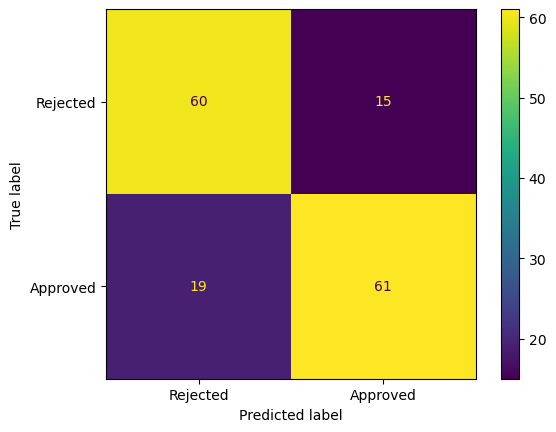

In [224]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=['Rejected','Approved'])
cm_disp.plot()

### Classification report

In [228]:
from sklearn.metrics import classification_report

In [229]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.80      0.76      0.78        80

    accuracy                           0.78       155
   macro avg       0.78      0.78      0.78       155
weighted avg       0.78      0.78      0.78       155



### Feature importance

#### Since we're using Random Forest Classifier, we'll look at one way we can calculate feature importance for it.

In [230]:
rf_random.feature_importances_

array([0.31659607, 0.12625705, 0.12719246, 0.42995442])

##### Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of donor application data leans more towards to if they can donate blood or not.

In [232]:
# Match features to columns
feature_val = pd.DataFrame({'coef':rf_random.feature_importances_},index = X_res.columns)

In [233]:
feature_val.sort_values(by = 'coef',ascending = False)

,coef
Time_in_months,0.429954
Recency_months,0.316596
Monetary_cc_blood,0.127192
Frequency,0.126257


In [234]:
#### The larger the value , the more the feature contributes to the models decision.

### Model insights:

#### If Random forest is used to classify our model we can say Time_in_months and recency are the  important features to predict blood donation approval status.

# Summary

#### In this project, I have tried to find out the factors that are most important for getting an approval for  donor's blood donation approval through the power of Data Analysis and Machine learning. Though I have achieved 79% of accuracy, I also try to collect more data to increase performance of the model. However, 79% is the best i could get from this data using both the model and Random forest.